# Chain of coupled Hydrogen-like atoms
## 0. Prerequisites

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import numpy as np
np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import tb

## 1. Adding new species

Let us define two atoms, called A and B, each has a silgle $s$ orbital and diffrrent energies -1 eV and -0.7 eV.

In [2]:
a = tb.Atom('A')
a.add_orbital(title='s', energy=-1, )
b = tb.Atom('B')
b.add_orbital(title='s', energy=-0.7, )

Now we define a set of of orbitals for tight-binding computations registring created atoms:

In [ ]:
tb.Atom.orbital_sets = {'A': a, 'B': b}

The geometrical parameters of the system are specified by a xyz-file:

In [4]:
xyz_file="""2
H cell
A       0.0000000000    0.0000000000    0.0000000000
B       0.0000000000    0.0000000000    1.0000000000
"""

Now one needs to specify the coupling parameters between pairs of atoms with a given diatomic symmetry:

In [5]:
tb.set_tb_params(PARAMS_A_B={'ss_sigma': 0.3})

## 2. Computing Hamiltonian matrix elments
At this point the hamiltonian matrix can be computed and visualized:

[[-1. +0.j  0.3+0.j]
 [ 0.3+0.j -0.7+0.j]]


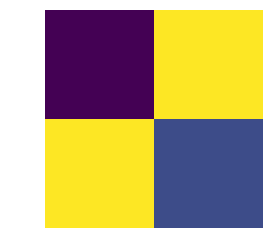

In [6]:
h = tb.Hamiltonian(xyz=xyz_file, nn_distance=1.1)
h.initialize()
plt.axis('off')
plt.imshow(np.real(h.h_matrix))
print h.h_matrix

## 3. Band structure computation and visualization

Let us specify periodic bondary conditions. Below, assume that system is translated in along axis z:

In [7]:
PRIMITIVE_CELL = [[0, 0, 2.0]]
h.set_periodic_bc(PRIMITIVE_CELL)

Now we determine a set of k-points where we want to compute band structure.

In [8]:
num_points = 20
kk = np.linspace(0, 3.14/2, num_points, endpoint=True)

The band structure computations are performed below for each k-point:

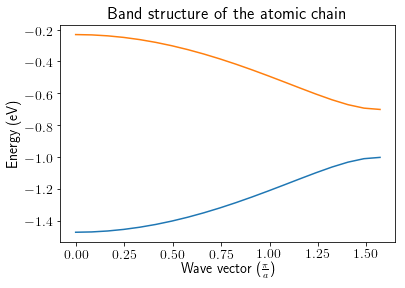

In [9]:
band_sructure = []

for jj in xrange(num_points):
    vals, _ = h.diagonalize_periodic_bc([0.0, 0.0, kk[jj]])
    band_sructure.append(vals)

band_sructure = np.array(band_sructure)

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif', size=14)
ax = plt.axes()
ax.set_title('Band structure of the atomic chain')
ax.set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax.set_ylabel(r'Energy (eV)')
ax.plot(kk, np.sort(np.real(band_sructure)))
plt.show()